# **Installing Libraries**

In [1]:
!pip install split-folders

# **Importing libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix, classification_report, f1_score 
import seaborn as sns
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers , models
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import splitfolders
import os
import cv2

# **Loading Dataset**

In [3]:
Dataset_path = pathlib.Path('/kaggle/input/rice-image-dataset/Rice_Image_Dataset')

# **Introduction**

In this project, we have embarked on an exploration of image classification using the Rice_Image dataset, a collection of 75,000 images meticulously categorized into five distinct classes:

'Arborio,' 'Basmati,' 'Ipsala,' 'Jasmine,' and 'Karacadag.'

The primary objective of this endeavor is to construct and train convolutional neural network (CNN) models capable of accurately classifying these rice images. To accomplish this, we employed one of the most popular deep learning frameworks: TensorFlow. TensorFlow is leveraged for tasks encompassing dataset loading, normalization, as well as the construction, training, and testing of CNN models. The primary goals of this notebook are to develop, train, and assess CNN models, identify the optimal one among them, and ultimately visualize the outcomes.

# **Introduction to Dataset**

The Rice_Image dataset is a rich collection of rice images, with each class containing 15,000 data points.

These images are of dimensions 250x250 pixels, providing ample visual information to enable accurate classification. The dataset's diversity reflects the unique characteristics of each rice type, making it an ideal candidate for showcasing the potential of CNN models in image classification tasks.

# **Tensorflow Approach**

In the TensorFlow framework, we meticulously loaded and normalized the dataset.

We constructed three distinct CNN models, each with its own architecture, to ensure a comprehensive exploration of various model configurations.

The first model employed a relatively simple architecture with one convolutional layer, while the second and third models featured additional convolutional layers, max-pooling layers, and dense layers for enhanced complexity.

The training process included an exploration of early stopping techniques to prevent overfitting. Through rigorous training and validation, we assessed the models' performance, aiming to find the optimal architecture for accurate classification.

# **Preparing Dataset**

In [4]:
# Splitting the data into three folders: Train, Validation, and Test
splitfolders.ratio(Dataset_path, output='Images', seed=42, ratio=(.7,.15,.15))

Copying files: 75000 files [08:31, 146.50 files/s]


In [5]:
Img_Size = (250, 250)
seed = 42
Batch_Size = 32

In [6]:
Train = keras.utils.image_dataset_from_directory(
    'Images/train',
    labels='inferred',
    label_mode='int',
    batch_size = Batch_Size,
    image_size = Img_Size,
    seed=seed,shuffle = True,
)
Validation = keras.utils.image_dataset_from_directory(
    'Images/val',
     labels='inferred',
    label_mode='int',
    batch_size = Batch_Size,
    image_size = Img_Size,
    seed=seed,shuffle = True,
)

Test = keras.utils.image_dataset_from_directory(
    'Images/test',
     labels='inferred',
    label_mode='int',
    batch_size = Batch_Size,
    image_size = Img_Size,
    seed=seed,shuffle = True,
)

Found 52500 files belonging to 5 classes.
Found 11250 files belonging to 5 classes.
Found 11250 files belonging to 5 classes.


In [7]:
Classes = [Train, Validation, Test]
for l in Classes:
    Class_labels = l.class_names
    print(Class_labels)

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


In [8]:
# Printing dataset shapes
def print_dataset_shapes(dataset, dataset_name):
    for image_batch, labels_batch in dataset:
        print(f"{dataset_name} Shape: {image_batch.shape} (Batches = {len(dataset)})")
        print(f"{dataset_name} Label: {labels_batch.shape}\n")
        break

In [9]:
datasets = [
    (Train, "Train"),
    (Validation, "Validation"),
    (Test, "Test")
]

# Print shapes for each dataset
for dataset, dataset_name in datasets:
    print_dataset_shapes(dataset, dataset_name)

Train Shape: (32, 250, 250, 3) (Batches = 1641)
Train Label: (32,)

Validation Shape: (32, 250, 250, 3) (Batches = 352)
Validation Label: (32,)

Test Shape: (32, 250, 250, 3) (Batches = 352)
Test Label: (32,)



In [10]:
# Visualising the Data

In [11]:
font1 = {'family':'serif','size':12}
font2 = {'family':'serif','size':10}

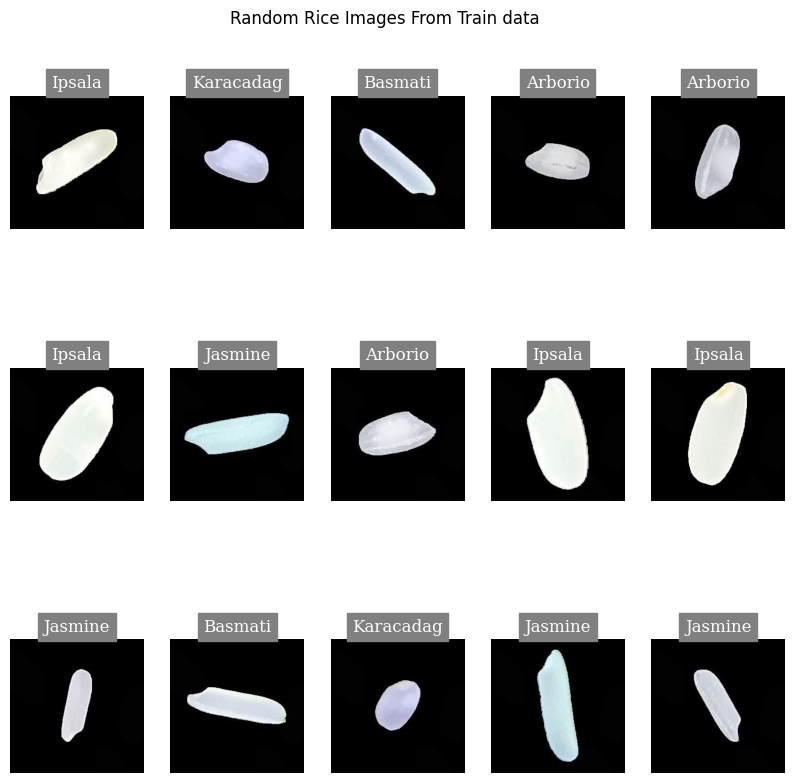

In [12]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

for Image,Classes in Train.take(1): 
    for i in range(1,16):
        plt.subplot(3,5,i)
        plt.imshow(Image[i].numpy().astype("uint8"))
        plt.title(Class_labels[Classes[i]],backgroundcolor='grey',color='white',fontdict=font1)
        plt.axis("off")
        plt.suptitle('Random Rice Images From Train data', y=0.92)
plt.show()

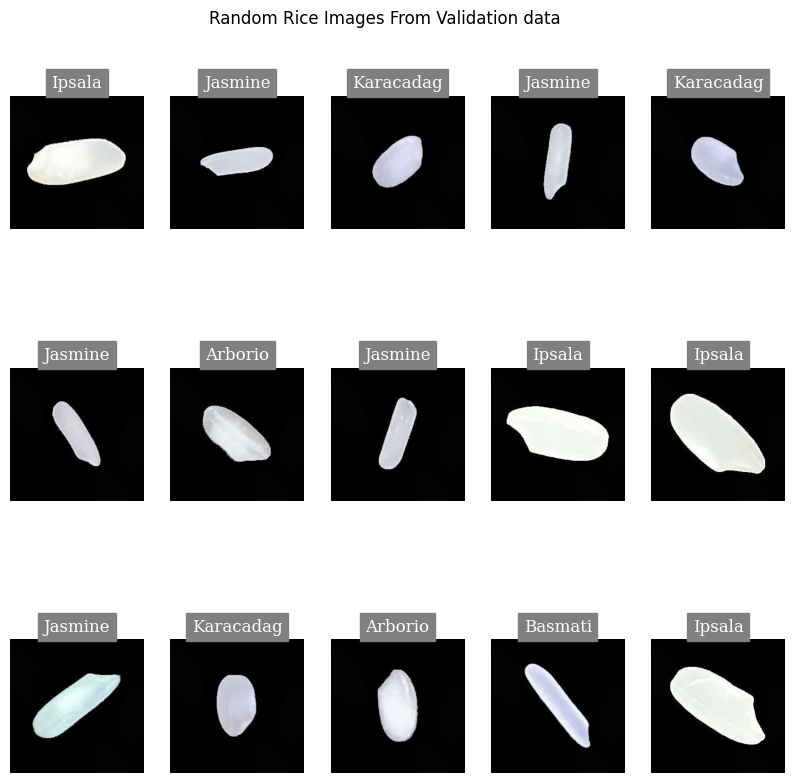

In [13]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

for Image,Classes in Validation.take(1): 
    for i in range(1,16):
        plt.subplot(3,5,i)
        plt.imshow(Image[i].numpy().astype("uint8"))
        plt.title(Class_labels[Classes[i]],backgroundcolor='grey',color='white',fontdict=font1)
        plt.axis("off")
        plt.suptitle('Random Rice Images From Validation data', y=0.92)
plt.show()

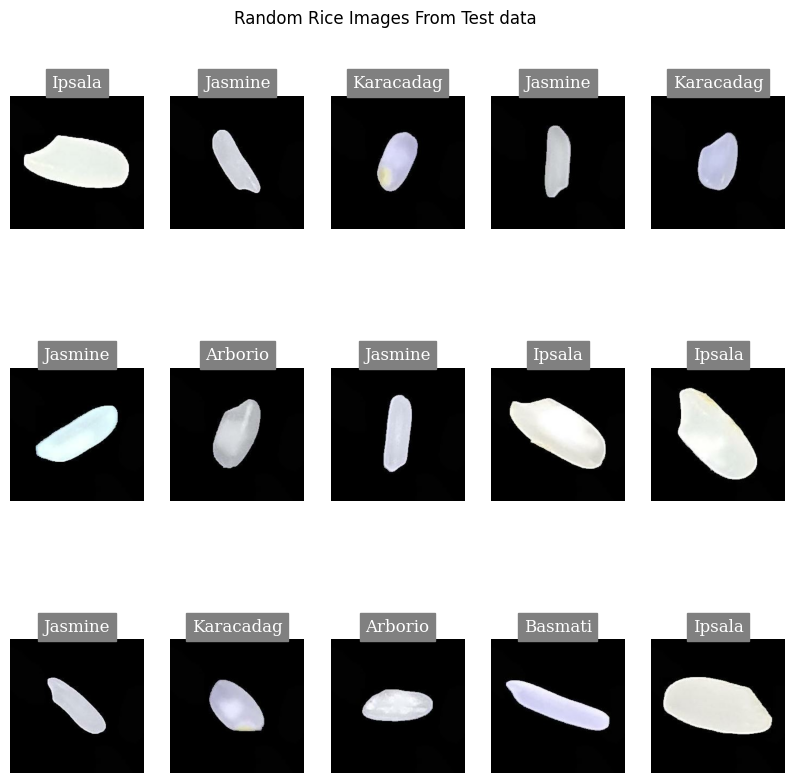

In [14]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

for Image,Classes in Test.take(1): 
    for i in range(1,16):
        plt.subplot(3,5,i)
        plt.imshow(Image[i].numpy().astype("uint8"))
        plt.title(Class_labels[Classes[i]],backgroundcolor='grey',color='white',fontdict=font1)
        plt.axis("off")
        plt.suptitle('Random Rice Images From Test data', y=0.92)
plt.show()

# **Modeling**

# **First model**

**A Simple Model with One Convolutional Layer:**

In [15]:
CNN_model1 = models.Sequential(
    [
        layers.Rescaling(1./255, input_shape=(250, 250, 3)),
        layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
        layers.MaxPool2D(pool_size=2, strides=2),
        layers.Flatten(),
        layers.Dense(units=512, activation='relu'),
        layers.Dropout(0.5),  # Adding dropout for regularization
        layers.Dense(units=5, activation='sigmoid')
    ]
)

# Compile the model
CNN_model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use appropriate loss for multi-class classification
    metrics=['accuracy']
)

# Summary of the model architecture
CNN_model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 250, 250, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 248, 248, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 124, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 492032)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │     251,920,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 251,924,357 (961.02 MB)

 Trainable params: 251,924,357 (961.02 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Function for Comparing Training and Validation Results of Different Models:
def visualizing_results(history, model_name):
    font1 = {'family':'serif','size':15}
    font2 = {'family':'serif','size':12}
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy',color='b', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy',color='orange',marker='d')
    plt.xlabel('Epoch', fontsize=12,labelpad=16)
    plt.ylabel('Accuracy', fontsize=12,labelpad=16)
    plt.title(f'{model_name} - Training and Validation Accuracy',backgroundcolor='grey',color='white',fontdict=font1)
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'], label='Train Loss',color='b', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss',color='orange',marker='d')
    plt.xlabel('Epoch', fontsize=12,labelpad=16)
    plt.ylabel('Loss', fontsize=12,labelpad=16)
    plt.title(f'{model_name} - Training and Validation Loss',backgroundcolor='grey',color='white',fontdict=font1)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

**1. Fitting the Model Using EarlyStopping**

In this section, we enhance the model training process by incorporating the EarlyStopping callback.

This mechanism continually monitors the validation loss during training. If the validation loss fails to improve for a defined number of consecutive epochs (as specified by the 'patience' parameter), the training process is stopped.

By integrating EarlyStopping, we mitigate overfitting risk and optimize training efficiency, exemplifying a cautious approach that considers the model's performance on unseen validation data.

In [17]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model with the EarlyStopping callback
history1_m1 = CNN_model1.fit(
    Train,
    epochs=20,  
    validation_data=Validation,
    callbacks=[early_stopping],
   verbose=1
)

Epoch 1/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 77s 43ms/step - accuracy: 0.9031 - loss: 1.0327 - val_accuracy: 0.9865 - val_loss: 0.0444
Epoch 2/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 63s 38ms/step - accuracy: 0.9738 - loss: 0.0749 - val_accuracy: 0.9704 - val_loss: 0.0863
Epoch 3/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 63s 38ms/step - accuracy: 0.9835 - loss: 0.0483 - val_accuracy: 0.9734 - val_loss: 0.0880
Epoch 4/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 63s 38ms/step - accuracy: 0.9875 - loss: 0.0341 - val_accuracy: 0.9650 - val_loss: 0.1671


**Visualizing Confusion Matrix and Model Comparison Results:**

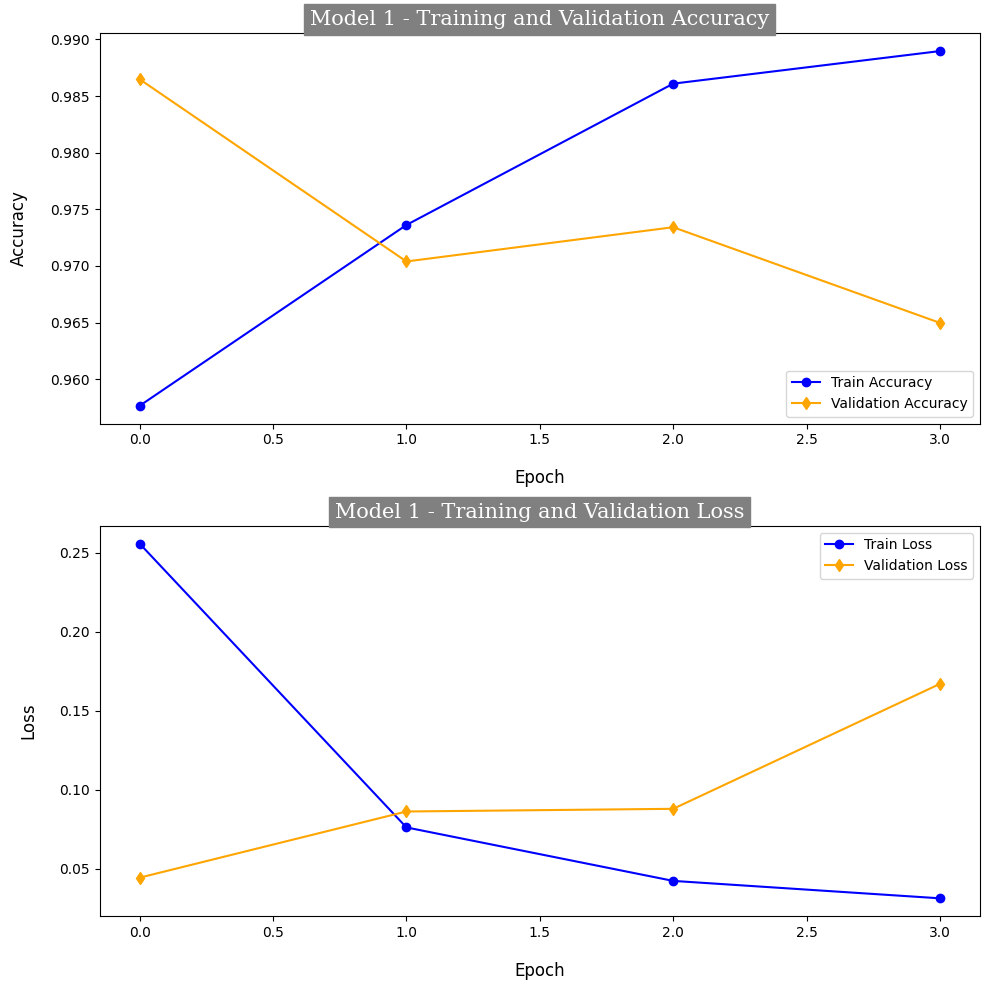

In [18]:
visualizing_results(history1_m1, "Model 1")

**2. Fitting the Model Without Using EarlyStopping**

In [19]:
history2_m1 = CNN_model1.fit(
    Train,
    epochs=20,  
    validation_data=Validation,
    verbose=1
)

Epoch 1/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 64s 39ms/step - accuracy: 0.9611 - loss: 0.1177 - val_accuracy: 0.9702 - val_loss: 0.0918
Epoch 2/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 63s 38ms/step - accuracy: 0.9818 - loss: 0.0558 - val_accuracy: 0.9744 - val_loss: 0.0947
Epoch 3/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 63s 38ms/step - accuracy: 0.9920 - loss: 0.0247 - val_accuracy: 0.9741 - val_loss: 0.1069
Epoch 4/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 63s 38ms/step - accuracy: 0.9948 - loss: 0.0153 - val_accuracy: 0.9731 - val_loss: 0.1267
Epoch 5/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 63s 38ms/step - accuracy: 0.9966 - loss: 0.0098 - val_accuracy: 0.9745 - val_loss: 0.1337
Epoch 6/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 63s 38ms/step - accuracy: 0.9976 - loss: 0.0071 - val_accuracy: 0.9742 - val_loss: 0.1467
Epoch 7/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 63s 38ms/step - accuracy: 0.9975 - loss: 0.0074 - val_accuracy: 0.9759 - val_loss: 0.1555
Epoch 8/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 63s 38ms/step - accuracy: 0.9982 -

**Visualizing Model Comparison Results:**

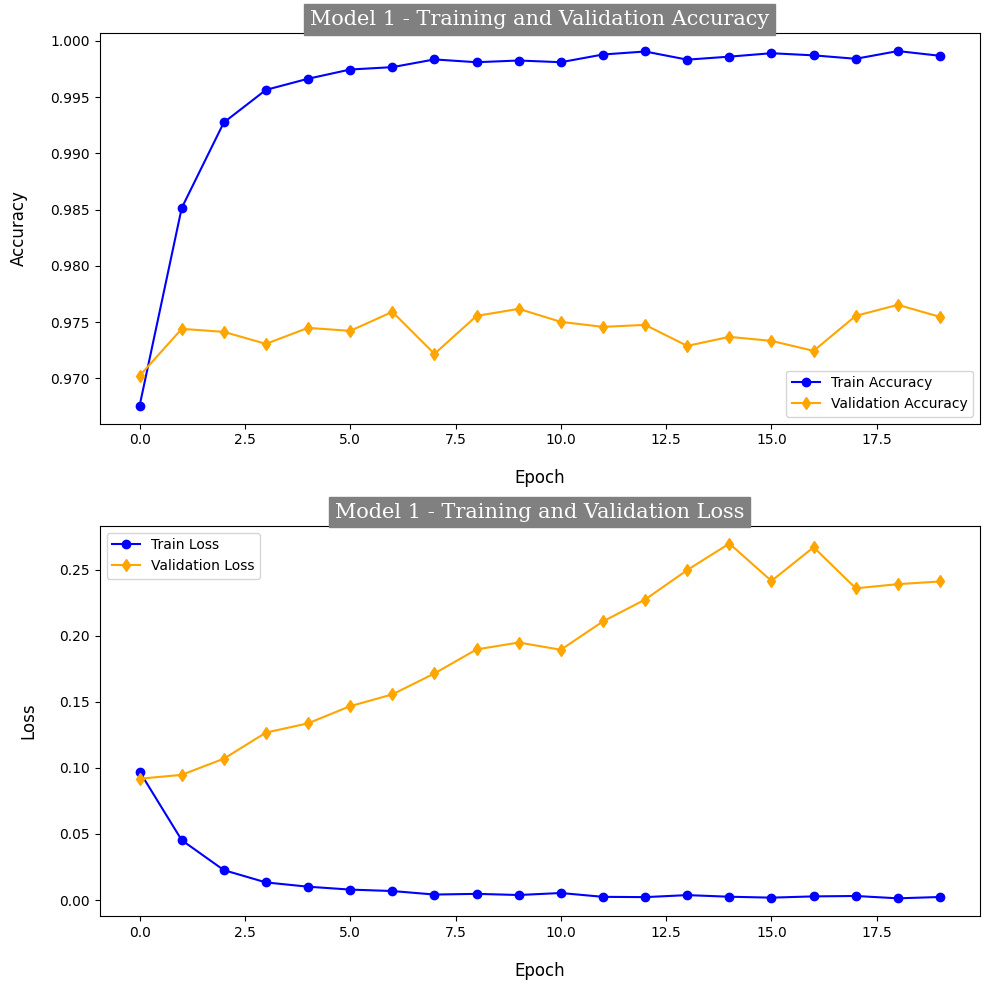

In [20]:
visualizing_results(history2_m1, "Model 1")

In [21]:
# Evaluate the model on the test data
test_loss, test_accuracy = CNN_model1.evaluate(Test, verbose=1)

print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9783 - loss: 0.2203
Test loss: 0.2221
Test accuracy: 0.9773


# **Second Model**

**A Dual-Layer Convolution and Dual-Layer Pooling:**

In [22]:
CNN_model2 = models.Sequential(
    [
        layers.Rescaling(1./255, input_shape=(250, 250, 3)),
        layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
        layers.MaxPool2D(pool_size=2, strides=2),
        layers.Conv2D(filters=64, kernel_size=3, activation='relu'),  # Additional Convolutional Layer
        layers.MaxPool2D(pool_size=2, strides=2),
        layers.Flatten(),
        layers.Dense(units=512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(units=5, activation='sigmoid')
    ]
)

CNN_model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

CNN_model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 250, 250, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 248, 248, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 124, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 122, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 238144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │     121,930,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,952,197 (465.21 MB)

 Trainable params: 121,952,197 (465.21 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history1_m2 = CNN_model2.fit(
    Train,
    epochs=20,  
    validation_data=Validation,
    verbose=1
)

Epoch 1/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 69s 40ms/step - accuracy: 0.9126 - loss: 0.3032 - val_accuracy: 0.9740 - val_loss: 0.0765
Epoch 2/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 59s 36ms/step - accuracy: 0.9737 - loss: 0.0786 - val_accuracy: 0.9758 - val_loss: 0.0763
Epoch 3/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 59s 36ms/step - accuracy: 0.9818 - loss: 0.0537 - val_accuracy: 0.9849 - val_loss: 0.0456
Epoch 4/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 59s 36ms/step - accuracy: 0.9881 - loss: 0.0369 - val_accuracy: 0.9874 - val_loss: 0.0456
Epoch 5/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 60s 36ms/step - accuracy: 0.9909 - loss: 0.0280 - val_accuracy: 0.9846 - val_loss: 0.0543
Epoch 6/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 59s 36ms/step - accuracy: 0.9935 - loss: 0.0177 - val_accuracy: 0.9884 - val_loss: 0.0495
Epoch 7/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 59s 36ms/step - accuracy: 0.9945 - loss: 0.0177 - val_accuracy: 0.9878 - val_loss: 0.0521
Epoch 8/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 59s 36ms/step - accuracy: 0.9969 -

**Visualizing Model Comparison Results:**

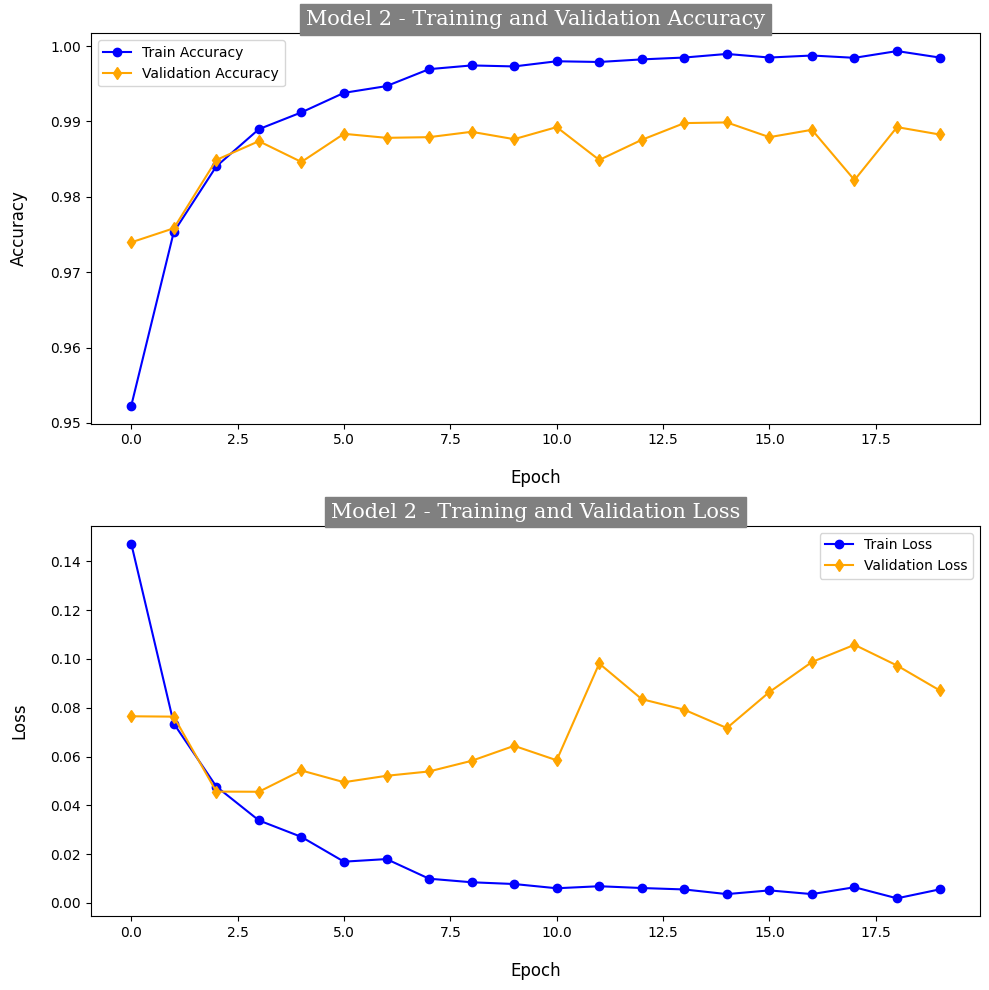

In [24]:
visualizing_results(history1_m2, "Model 2")

# **Third Model**

**I've employed the LeNet-5 model in this section:**

In [25]:
# Define the model
CNN_model3 = models.Sequential(
    [
        layers.Rescaling(1./255, input_shape=(250, 250, 3)),
        layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
        layers.MaxPool2D(pool_size=2, strides=2),
        layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
        layers.MaxPool2D(pool_size=2, strides=2),
        layers.Flatten(),
        layers.Dense(units=512, activation='relu'),
        layers.Dense(units=120, activation='relu'),
        layers.Dense(units=5, activation='sigmoid')
    ]
)

# Compile the model
CNN_model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use appropriate loss for multi-class classification
    metrics=['accuracy']
)

# Summary of the model architecture
CNN_model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 250, 250, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 248, 248, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 124, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 122, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 238144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │     121,930,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 120)                 │          61,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 5)                   │             605 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,011,797 (465.44 MB)

 Trainable params: 122,011,797 (465.44 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history1_m3 = CNN_model3.fit(
    Train,
    epochs=20,  
    validation_data=Validation,
    verbose=1
)

Epoch 1/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 68s 40ms/step - accuracy: 0.9231 - loss: 0.2799 - val_accuracy: 0.9756 - val_loss: 0.0723
Epoch 2/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 60s 36ms/step - accuracy: 0.9779 - loss: 0.0670 - val_accuracy: 0.9811 - val_loss: 0.0583
Epoch 3/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 60s 37ms/step - accuracy: 0.9894 - loss: 0.0321 - val_accuracy: 0.9832 - val_loss: 0.0541
Epoch 4/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 60s 37ms/step - accuracy: 0.9910 - loss: 0.0259 - val_accuracy: 0.9844 - val_loss: 0.0558
Epoch 5/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 60s 37ms/step - accuracy: 0.9949 - loss: 0.0152 - val_accuracy: 0.9916 - val_loss: 0.0394
Epoch 6/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 60s 36ms/step - accuracy: 0.9948 - loss: 0.0159 - val_accuracy: 0.9686 - val_loss: 0.1003
Epoch 7/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 60s 37ms/step - accuracy: 0.9914 - loss: 0.0248 - val_accuracy: 0.9794 - val_loss: 0.0709
Epoch 8/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 60s 36ms/step - accuracy: 0.9977 -

**Visualizing Model Comparison Results:**

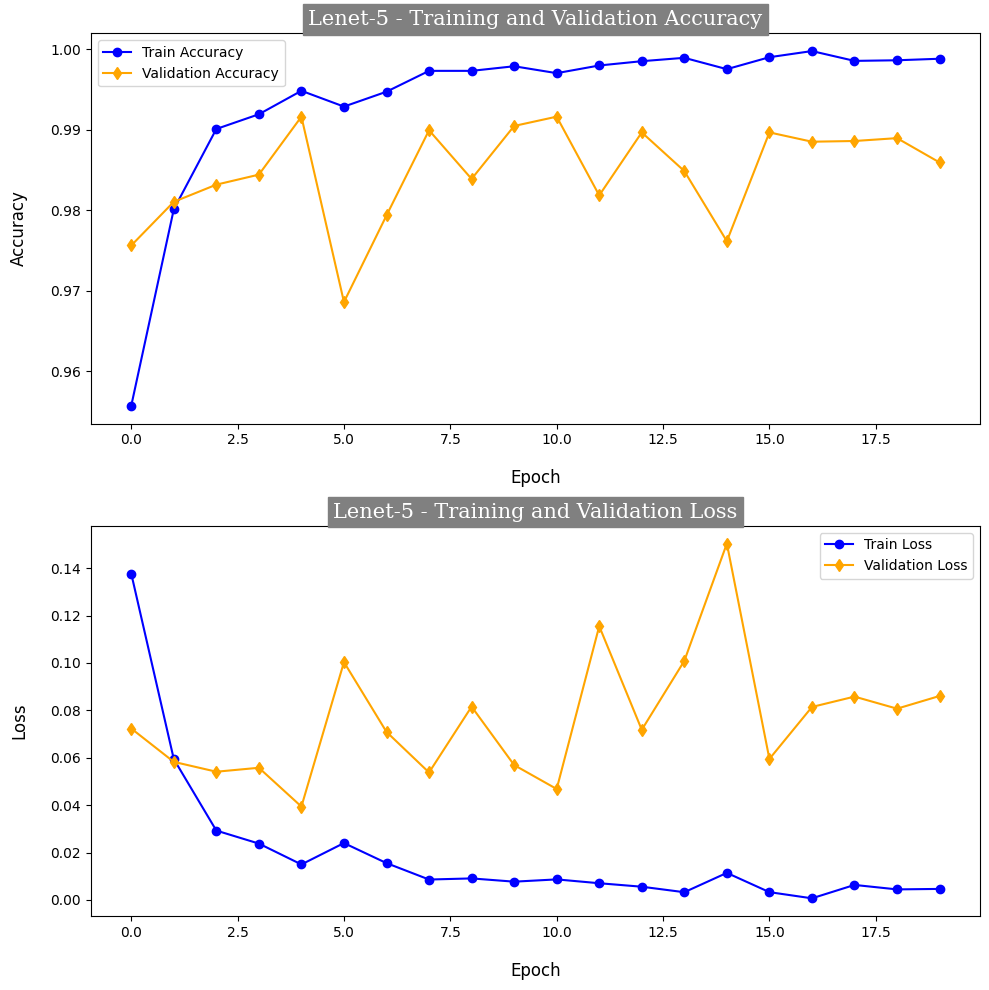

In [27]:
visualizing_results(history1_m3, "Lenet-5")

In [28]:
# Evaluate the model on the test data
test_loss, test_accuracy = CNN_model3.evaluate(Test)

print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9888 - loss: 0.0762
Test loss: 0.0766
Test accuracy: 0.9871


# **Conclusion**

Comparative Analysis of Rice Image Classification Models

In this study, three distinct CNN models were developed for the classification of rice varieties based on images. The performance of each model was assessed, leading to valuable insights into their strengths and areas of improvement.

**Model 1: Simple Convolutional Network**

The first model, a straightforward convolutional network, showcased competitive accuracy on the validation set, hovering around 98%. While its training and validation accuracy curves were relatively aligned, a notable concern arose from a slight increase in validation loss towards the end of training. This indicates potential overfitting, suggesting that further regularization techniques might be beneficial.

**Model 2: Enhanced Convolutional Network**

The second model, featuring an additional convolutional layer, offered similar accuracy to the first model on the validation set. However, its convergence dynamics were more erratic, with some fluctuations in training and validation accuracy. This suggests a possible struggle in generalization, warranting closer attention to model complexity and potential optimization.

**Model 3: LeNet-5 Inspired Architecture**

The third model, drawing inspiration from the classic LeNet-5 architecture, emerged as a strong contender. It showcased consistent convergence, with training and validation accuracy curves aligning closely. Most notably, this model achieved an accuracy of around 98% on the validation set, reflecting effective learning and generalization. The simplicity of the LeNet-5 architecture seemed to contribute positively to its performance and stability.

In evaluating these models, the LeNet-5 inspired architecture demonstrated remarkable performance, balancing accuracy, convergence, and model complexity effectively. While all models presented potential, the LeNet-5 inspired approach stands out as a compelling choice for rice image classification. Further refinements and optimizations to this architecture hold the promise of even more impressive results, not only in rice classification but also in various image classification tasks.

# **Saving Model** 

In [29]:
Final_Model = CNN_model3
Final_Model.save("CNN_model3.h5")